# Exploratory Data Analysis

This notebook focus on the development of an EDA to help understand the behaviour of the chosen dataset. The dataset is composed of 3 different files, one containing data from economy class, one from business class, and the last one that was the result of a join between the previous two and a cleaning stage.


## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 100)

## Initial analysis

In [2]:
df_economy = pd.read_csv("../data/economy.csv")
df_business = pd.read_csv("../data/business.csv")
df_cleaned = pd.read_csv("../data/Clean_Dataset.csv")

### Checking the shape of the values

In [3]:
print(f"economy shape: {df_economy.shape}")
print(f"business shape: {df_business.shape}")
print(f"merged shape: {df_cleaned.shape}")

economy shape: (206774, 11)
business shape: (93487, 11)
merged shape: (300153, 12)


### Data types and check for nulls

In [4]:
df_economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [6]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


### Checking some values ordered

At this point I was trying to understand which steps were made to clean the data, because I wanted to do my own cleaning.

In [7]:
df_cleaned.sort_values(by="days_left", ascending=True).head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
127541,127541,Vistara,UK-778,Kolkata,Afternoon,one,Evening,Mumbai,Economy,25.17,1,16044


In [8]:
df_cleaned.sort_values(by="days_left", ascending=False).head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585
35285,35285,Indigo,6E-963,Delhi,Evening,zero,Night,Hyderabad,Economy,2.33,49,4695


In [9]:
df_economy.head(2)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"


In [10]:
df_business.head(2)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"


In [11]:
df_cleaned.head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


### Checking the distribution of the values and the range

I could not move forward with the analysis that I wanted to do because of data format problems. And why not to work with the cleaned data? Because I wanted to understand the cleaning process and improve with some insights that I could have.

In [12]:
df_economy.describe()

,num_code
count,206774.000000
mean,1706.096714
std,2320.463721
min,101.000000
25%,588.000000
50%,818.000000
75%,960.000000
max,9991.000000


In [13]:
df_business.describe()

,num_code
count,93487.000000
mean,780.056147
std,147.616038
min,401.000000
25%,706.000000
50%,820.000000
75%,874.000000
max,996.000000


In [14]:
df_cleaned.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


Untill here I was dealing with three datasets, one from economy class, one from business and one from both with some preprocessing not done by myself. So I decided that was the time for some data preprocessing on my own. [Check the notebook](https://github.com/balthapaixao/ml-zoomcamp/blob/main/week-07/midterm_project/scripts/preprocessing.ipynb)

## Advanced analysis

In [15]:
df = pd.read_csv("../data/preprocessed_data.csv")

### Data types and check for nulls

In [72]:
def get_metadata(df: pd.DataFrame) -> None:
    print("Data type:")
    print(df.dtypes)
    print(20 * "--")
    print("Dimensions:")
    print(df.shape)
    print(20 * "--")
    print("Column names:")
    print(df.columns)
    print(20 * "--")
    print("Null values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))

In [73]:
get_metadata(df)

Data type:
airline            object
from               object
to                 object
price               int64
class              object
flight_code        object
stops              object
departure_time     object
arrival_time       object
datetime           object
dow                object
holiday             int64
days_until          int64
duration          float64
dtype: object
----------------------------------------
Dimensions:
(300259, 14)
----------------------------------------
Column names:
Index(['airline', 'from', 'to', 'price', 'class', 'flight_code', 'stops',
       'departure_time', 'arrival_time', 'datetime', 'dow', 'holiday',
       'days_until', 'duration'],
      dtype='object')
----------------------------------------
Null values:
airline           0.000000
from              0.000000
to                0.000000
price             0.000000
class             0.000000
flight_code       0.000000
stops             0.000000
departure_time    0.000000
arrival_time      0

In [74]:
df.head(2)

,airline,from,to,price,class,flight_code,stops,departure_time,arrival_time,datetime,dow,holiday,days_until,duration
0,SpiceJet,Delhi,Mumbai,5953,economy,SG8709,0,evening,evening,2022-02-11,Friday,0,1,130.0
1,SpiceJet,Delhi,Mumbai,5953,economy,SG8157,0,morning,morning,2022-02-11,Friday,0,1,140.0


In [75]:
df.describe()

,price,holiday,days_until,duration
count,300259.000000,300259.000000,300259.000000,300255.000000
mean,20883.800386,0.042950,26.004529,733.071306
std,22695.962230,0.202744,13.560967,431.571309
min,1105.000000,0.000000,1.000000,50.000000
25%,4783.000000,0.000000,15.000000,405.000000
50%,7425.000000,0.000000,26.000000,675.000000
75%,42521.000000,0.000000,38.000000,970.000000
max,123071.000000,1.000000,49.000000,2990.000000


## Some visualizations

This section is dedicated to data visualization. Trying to understand the data and the relations between the features.

### Airline distribution

We can check the Trujet and StarAir are very unexpressive compared to the other airlines

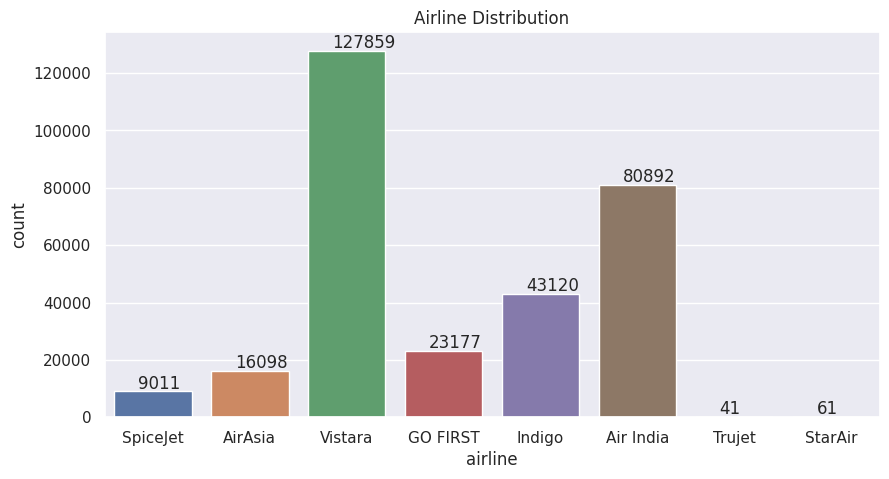

In [76]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(x="airline",
              data=df,
              ax=ax,
              hue="airline")

plt.title("Airline Distribution")
# write the count
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x()+0.25, p.get_height() + 1000))

plt.show()

### Distribution of the days until the flight

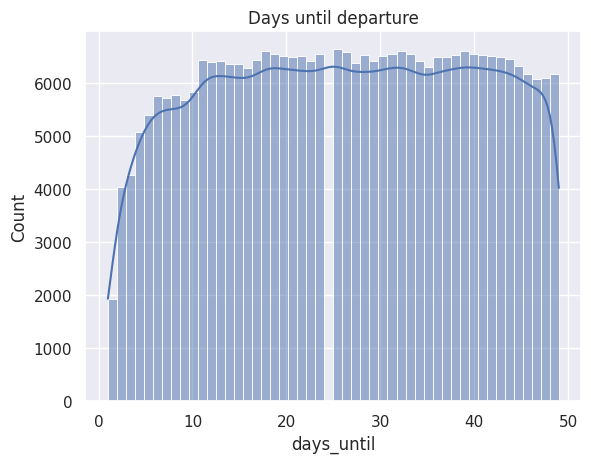

In [77]:
sns.set()
sns.histplot(data=df, x="days_until",
             bins=50,
             kde=True)
plt.title("Days until departure")
plt.show()

### Day of the week distribution

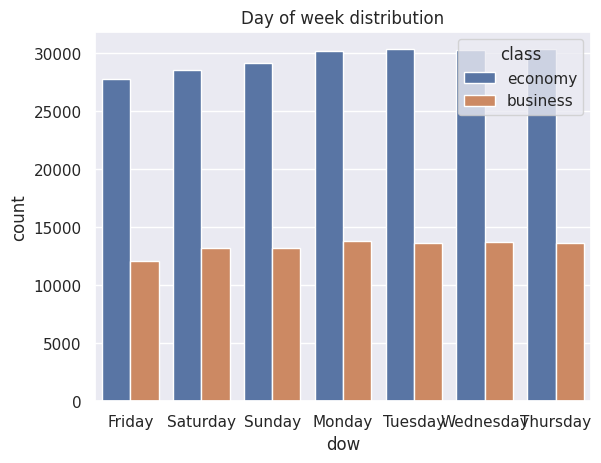

In [78]:
sns.set()
sns.countplot(x="dow", data=df, hue="class")

plt.title("Day of week distribution")
plt.show()

### Day of the week price distribution per class

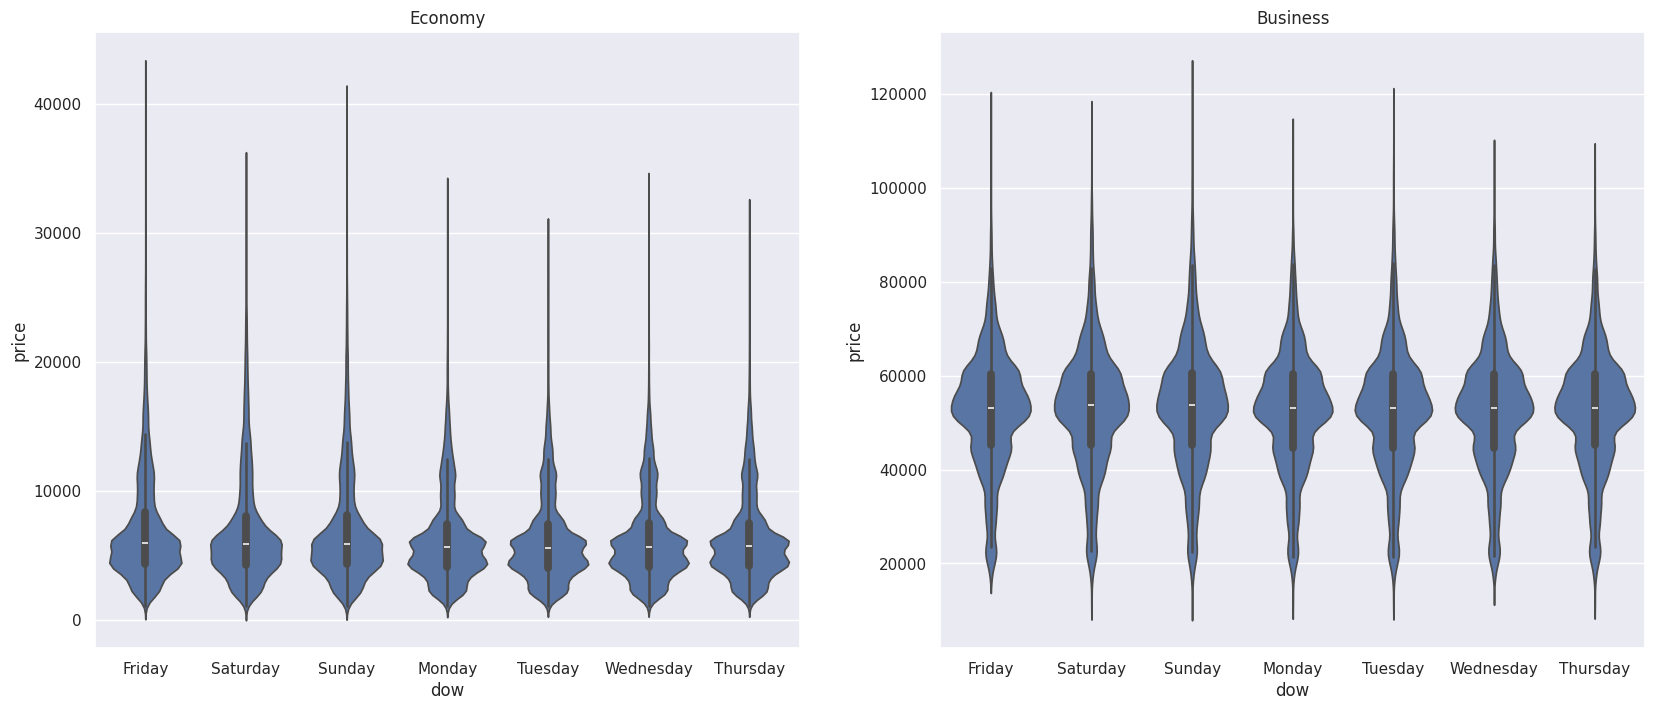

In [23]:
sns.set()
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.violinplot(x="dow", y="price",
               data=df.loc[df['class'] == 'economy'], ax=ax[0])
sns.violinplot(x="dow", y="price",
               data=df.loc[df['class'] == 'business'], ax=ax[1])

ax[0].set_title("Economy")
ax[1].set_title("Business")

plt.show()

### Mean price of the flight by day per class

We can check that economy class has a more stable price than business class considering the confidence interval

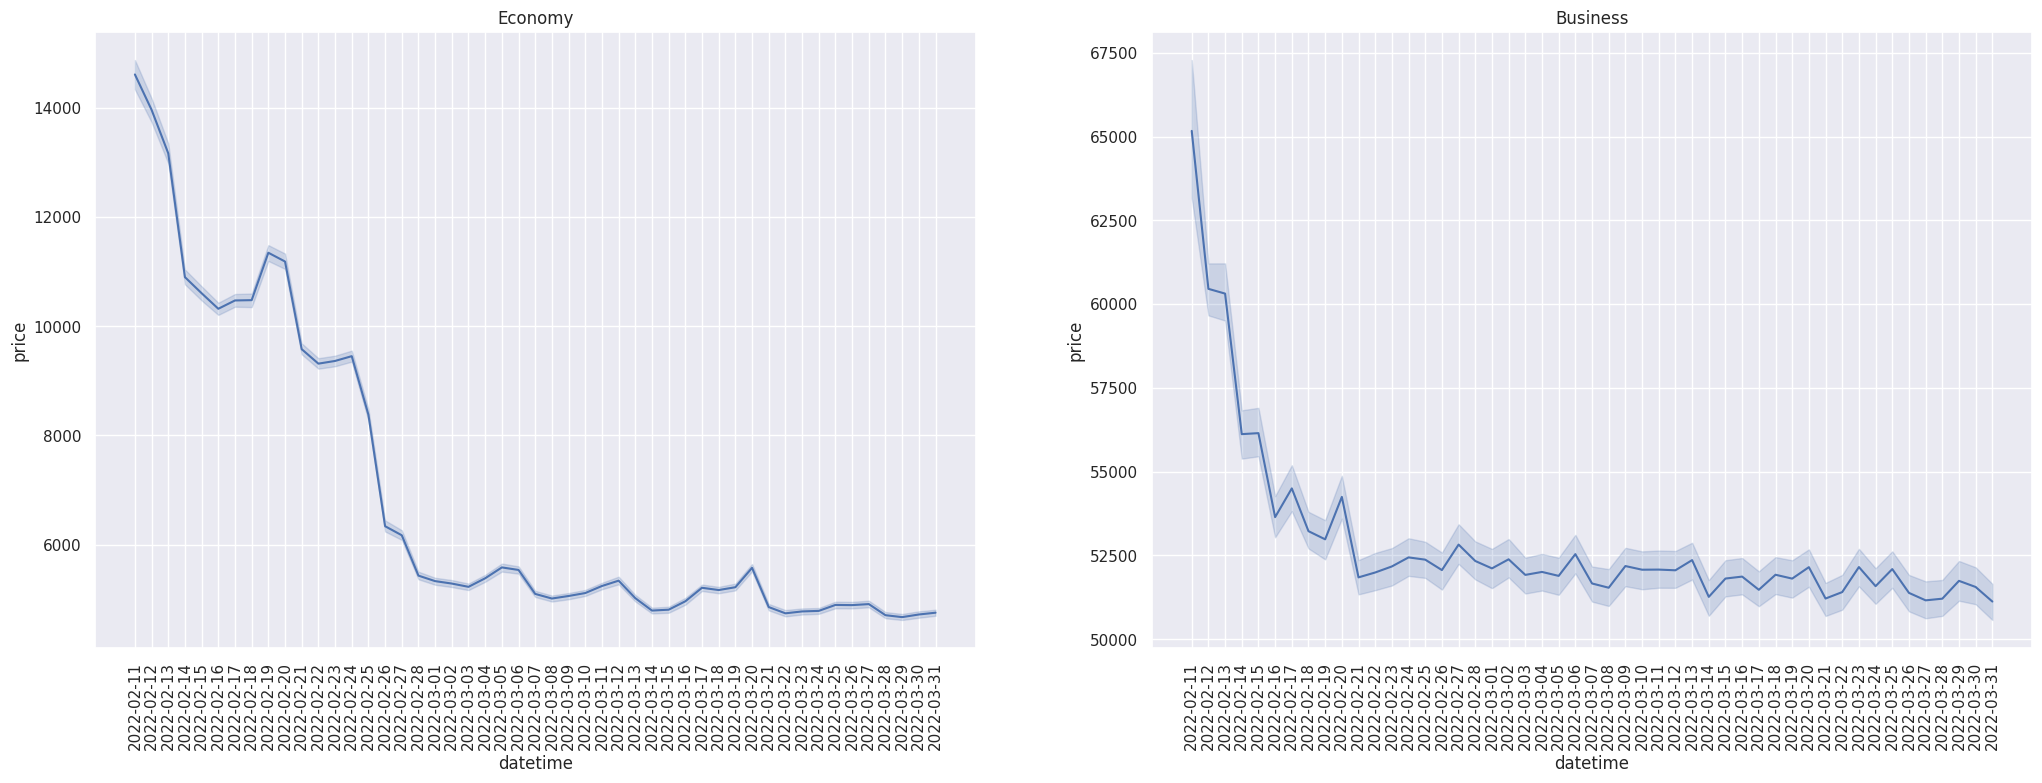

In [24]:
sns.set()
fig, ax = plt.subplots(1, 2, figsize=(25, 8))
sns.lineplot(x="datetime", y="price",
             data=df.loc[df['class'] == 'economy'], ax=ax[0])
sns.lineplot(x="datetime", y="price",
                data=df.loc[df['class'] == 'business'], ax=ax[1])

ax[0].set_title("Economy")
ax[1].set_title("Business")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.show()

### Most common departures and arrivals

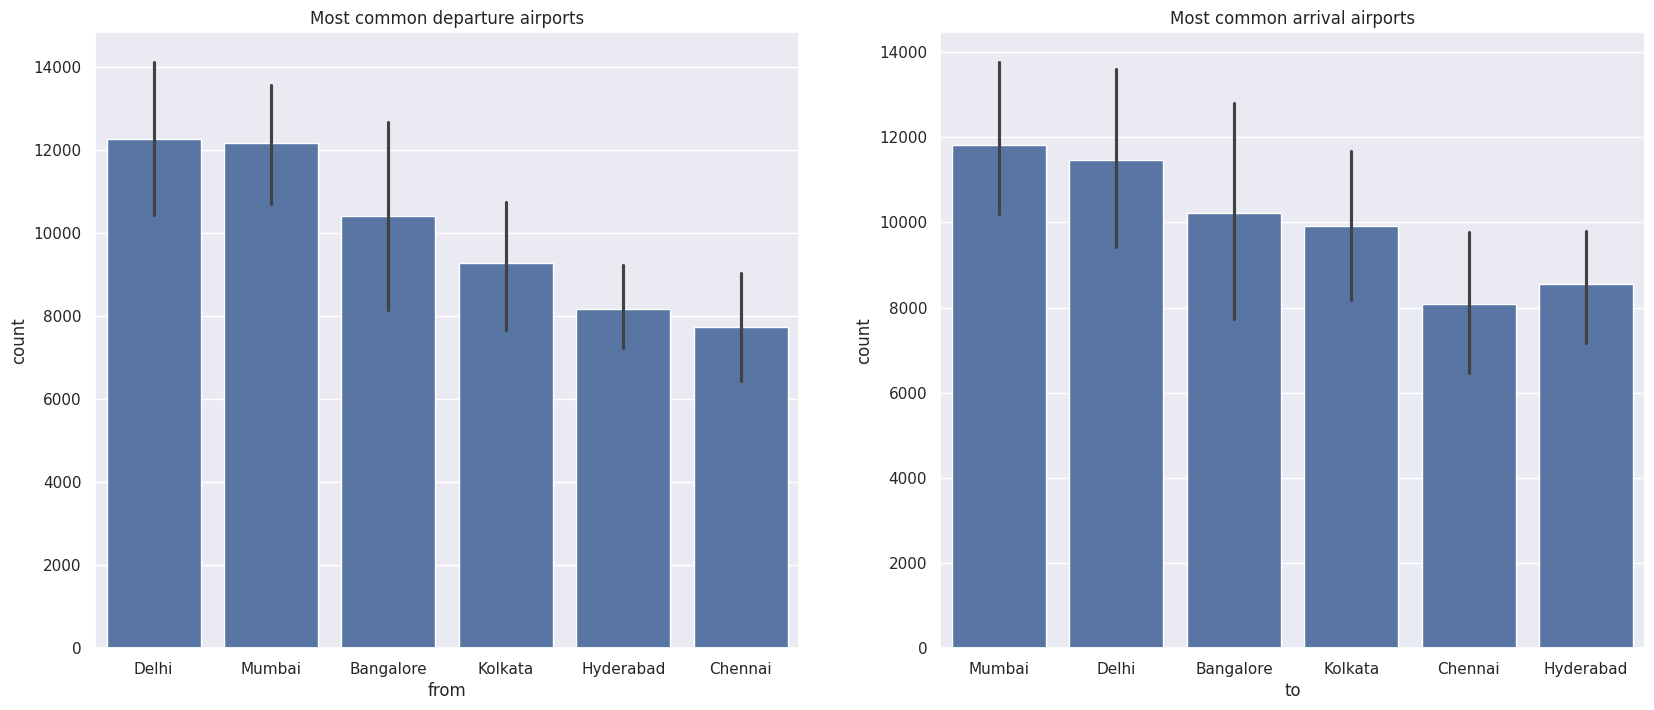

In [25]:
sns.set()
fig, ax = plt.subplots(1,2, figsize=(20, 8))

df_dest = df.groupby(["from", "to"]).size().reset_index()
df_dest.columns = ["from", "to", "count"]
df_dest = df_dest.sort_values(by="count", ascending=False)

sns.barplot(x="from", y="count", data=df_dest, ax=ax[0])
sns.barplot(x="to", y="count", data=df_dest, ax=ax[1])
ax[0].set_title("Most common departure airports")
ax[1].set_title("Most common arrival airports")


plt.show()

### A network visualization with a lat long information

In [79]:
lat_longs = {
    "Mumbai": [19.0760, 72.8777],
    "Delhi": [28.7041, 77.1025],
    "Bangalore": [12.9716, 77.5946],
    "Hyderabad": [17.3850, 78.4867],
    "Chennai": [13.0827, 80.2707],
    "Kolkata": [22.5726, 88.3639]
}
df_dest['from_lat'] = df_dest['from'].map(lambda x: lat_longs[x][0])
df_dest['from_long'] = df_dest['from'].map(lambda x: lat_longs[x][1])

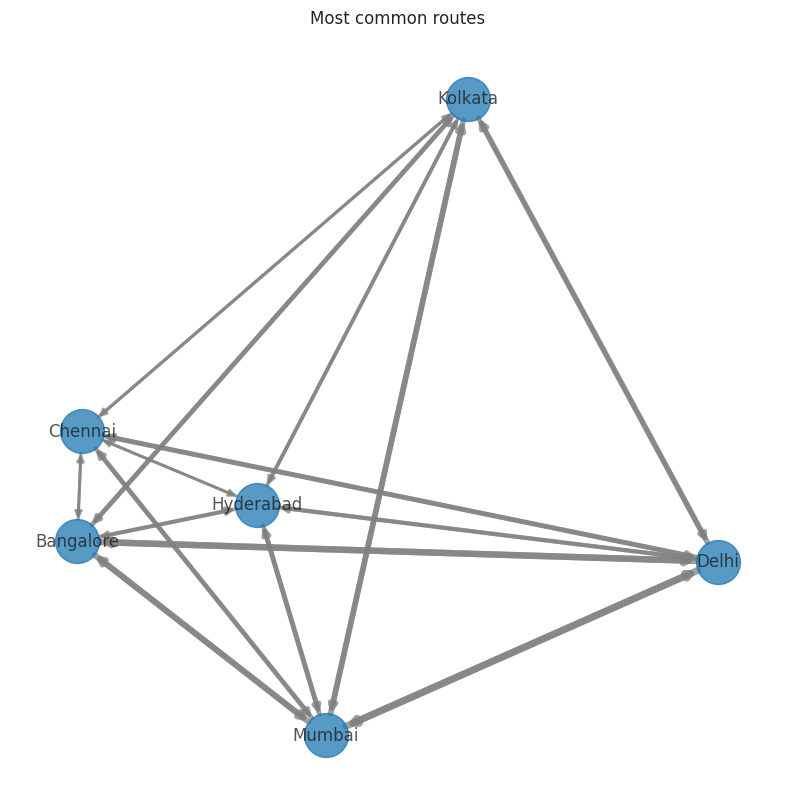

In [80]:
import networkx as nx

G_dest = nx.DiGraph()

G_dest.add_nodes_from(df_dest["from"].unique())

pos = {}
for node in G_dest.nodes():
    pos[node] = (df_dest.loc[df_dest["from"] == node, "from_lat"].values[0],
                 df_dest.loc[df_dest["from"] == node, "from_long"].values[0])

for i, row in df_dest.iterrows():
    G_dest.add_edge(row["from"], row["to"], weight=row["count"])
total_flights = sum([G_dest[u][v]['weight'] for u, v in G_dest.edges()])/100
edge_widths = [G_dest[u][v]['weight'] / total_flights for u, v in G_dest.edges()]

sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

nx.draw(G_dest,
                 pos,
                 ax=ax,
                 with_labels=True,
                 alpha=.75,
                 node_size=1000,
                 edge_color="grey",
                 width=edge_widths)
plt.title("Most common routes")

plt.show()